In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Differential equation in one variable

In [2]:
def AB_rxn(A, t, k1):
    dAdt = -k1 * A
    return dAdt

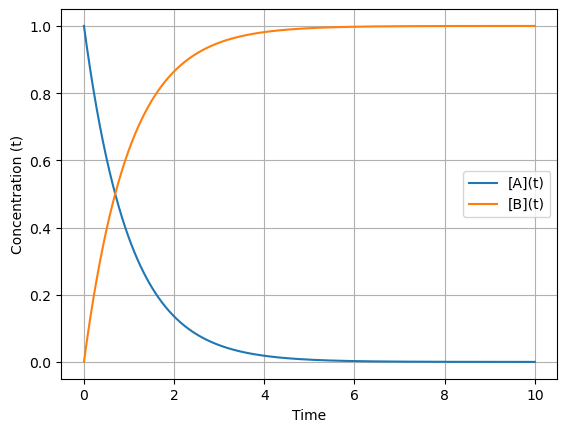

In [3]:
# Initial concentrations
A0 = 1.0

# Rate constants
k1 = 1.0

# Time 
t = np.linspace(0, 10, 1000)

# Solve the differential equations
solution = odeint(AB_rxn, A0, t, args=(k1,))

# Plot the results
plt.plot(t, solution, label='[A](t)')
plt.plot(t, A0-solution, label='[B](t)')
plt.xlabel('Time')
plt.ylabel('Concentration (t)')
plt.grid(True)
plt.savefig("ABrxn.png",bbox_inches='tight')
plt.legend()
plt.show()

# Differential equation in multiple variables

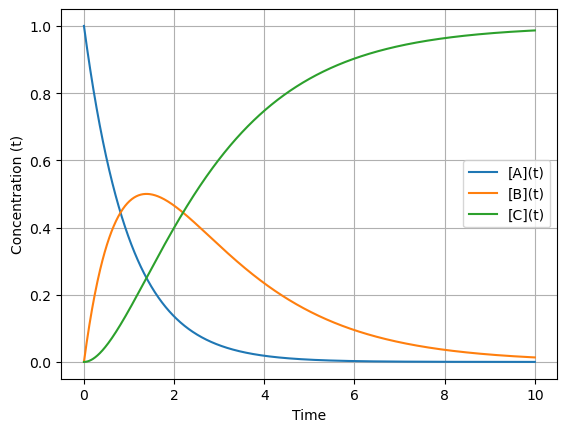

In [4]:
def ABC_rxn(y, t, k1, k2):
    A, B, C = y
    dAdt = -k1 * A
    dBdt = k1 * A - k2 * B
    dCdt = k2 * B
    return [dAdt, dBdt, dCdt]

# Initial concentrations
A0 = 1.0
B0 = 0.0
C0 = 0.0

# Rate constants
k1 = 1
k2 = 0.5

# Time 
t = np.linspace(0, 10, 1000)

# Solve the differential equations
solution = odeint(ABC_rxn, [A0, B0, C0], t, args=(k1, k2))

# Plot the results
plt.plot(t, solution[:, 0], label='[A](t)')
plt.plot(t, solution[:, 1], label='[B](t)')
plt.plot(t, solution[:, 2], label='[C](t)')
plt.xlabel('Time')
plt.ylabel('Concentration (t)')
plt.grid(True)
plt.savefig("ABCrxn.png",bbox_inches='tight')
plt.legend()
plt.show()

# Effect of rate constant and steady state approximation

In [5]:
def plot_ABC(solution,t,filename):
    # Plot the results
    plt.plot(t, solution[:, 0], label='[A](t)')
    plt.plot(t, solution[:, 1], label='[B](t)')
    plt.plot(t, solution[:, 2], label='[C](t)')
    plt.xlabel('Time')
    plt.ylabel('Concentration (t)')
    plt.grid(True)
    plt.savefig(filename,bbox_inches='tight')
    plt.legend()
    plt.show()
    
# Initial concentrations
A0 = 1.0
B0 = 0.0
C0 = 0.0

# Time 
t = np.linspace(0, 10, 1000)

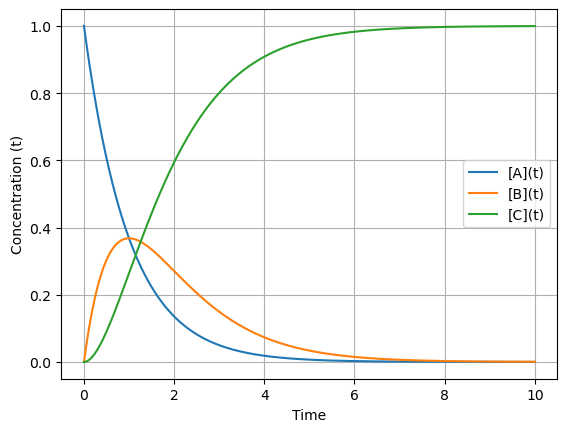

In [6]:
# Rate constants
k1 = 1
k2 = 1

# Solve the differential equations
solution = odeint(ABC_rxn, [A0, B0, C0], t, args=(k1, k2))

plot_ABC(solution,t,"ABCrxn_k1_k2_equal.png")

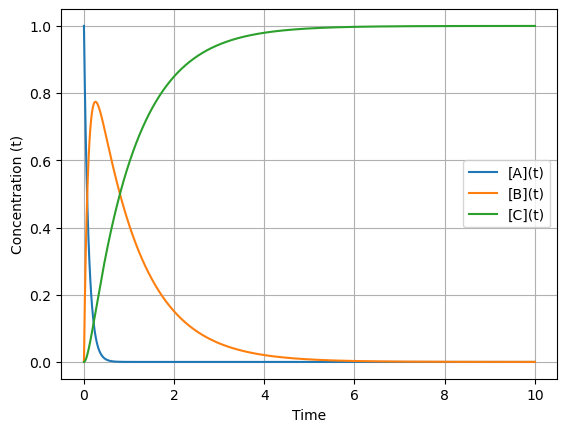

In [7]:
# Rate constants
k1 = 10
k2 = 1

# Solve the differential equations
solution = odeint(ABC_rxn, [A0, B0, C0], t, args=(k1, k2))

plot_ABC(solution,t,"ABCrxn_k1_gt_k2.png")

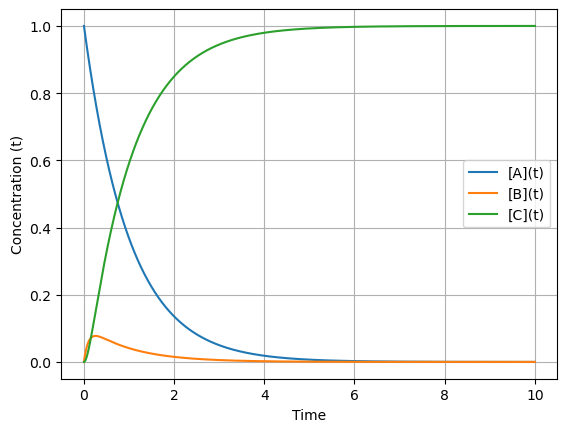

In [8]:
# Rate constants
k1 = 1
k2 = 10

# Solve the differential equations
solution = odeint(ABC_rxn, [A0, B0, C0], t, args=(k1, k2))

plot_ABC(solution,t,"ABCrxn_k1_lt_k2.png")

# Lotka-Volterra equations for predator-prey dynamics

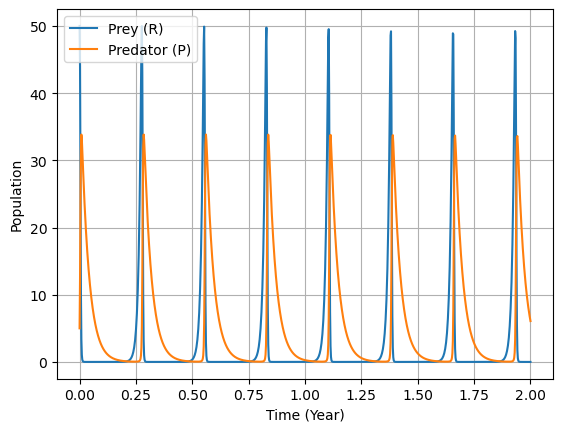

In [65]:
# Lotka-Volterra equations
def lotka_volterra(y, t, r, a, s, b):
    R, P = y
    dRdt = r * R - a * R * P
    dPdt = -s * P + b * R * P
    return [dRdt, dPdt]

# Initial populations of prey (R) and predator (P)
R0 = 50  # 100 rabbits
P0 =  5  # 5 foxes

# Rate constants
r = 100   # Prey reproduction rate, 100-per-year
a = 20    # Rate at which predators consume prey, 20-per-year
s = 30    # Predator death rate, 30-per-year
b = 10    # Rate at which predators increase by consuming prey, 10-per-year

# Time points
t = np.linspace(0, 2, 1000)

# Solve the Lotka-Volterra equations
solution = odeint(lotka_volterra, [R0, P0], t, args=(r, a, s, b))

# Plot the results
plt.plot(t, solution[:, 0], label='Prey (R)')
plt.plot(t, solution[:, 1], label='Predator (P)')
plt.xlabel('Time (Year)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('PredatorPrey.png',bbox_inches='tight')
plt.show()
